THE SPARKS FOUNDATION* IOT and COMPUTER VISION

NAME :THARUN V

TASK :1

TASK NAME:DETECTION OF COLOR IN AN IMAGE USING OPEN CV

In [19]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


The type of this input is <class 'numpy.ndarray'>
Shape: (1600, 1500, 3)


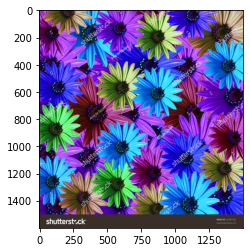

In [20]:
image = cv2.imread ('/content/image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

## Output
# The type of this input is <class 'numpy.ndarray'>
# Shape: (3456, 4608, 3)

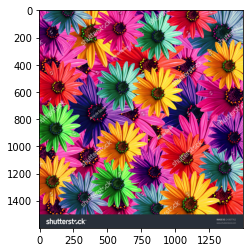

In [21]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

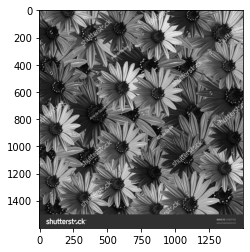

In [22]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

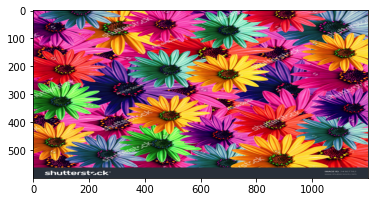

In [23]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [24]:

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [25]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [26]:
def  get_colors(image,number_of_colors,show_chart):
     modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
     modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(modified_image)
     counts = Counter(labels)

     center_colors = clf.cluster_centers_
     # We get ordered colors by iterating through the keys
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]

     if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

        return rgb_colors

[array([175.18256397,  10.19226512,  54.34279575]),
 array([123.84557318,  62.53729529, 151.55296827]),
 array([235.9781034 ,  77.24835499, 166.85678739]),
 array([ 43.37500639, 126.31144859,  88.1233318 ]),
 array([144.45657688, 203.44100927, 175.11199055]),
 array([227.07156238,  82.14305664,  34.2672775 ]),
 array([32.65857384, 29.05583723, 48.18722374]),
 array([249.77131623, 197.85057947,  52.79602649])]

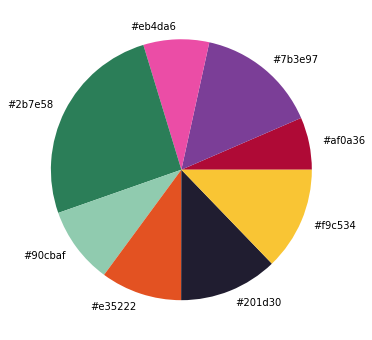

In [28]:
get_colors(get_image('/content/image.jpg'), 8, True)